# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    '%_cover', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75'])
            


# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,%_cover,mf_chm_MIN,mf_chm_MAX,mf_chm_MEAN,mf_chm_STD,mf_chm_Q25,mf_chm_Q50,mf_chm_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.85,0.445070,19.097736,12.233545,4.193715,10.158340,13.747563,15.172448
1,8.189,9.622,2005,818,0.59,2.92,2.47,1.00,12.465903,17.704655,14.964220,0.932190,14.531339,15.015374,15.519281
2,8.380,9.589,2001,818,0.78,2.88,2.44,1.00,13.028298,17.559893,15.329449,0.846132,14.765771,15.384996,15.925676
3,8.137,9.449,2040,833,0.52,2.72,2.55,0.97,2.128231,20.676994,15.392742,1.873981,14.341608,15.447217,16.691563
4,7.696,9.401,1758,717,0.22,2.83,2.14,1.00,12.171553,21.851387,17.944009,1.057209,17.360054,17.947407,18.591763


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   %_cover        103 non-null    float64
 8   mf_chm_MIN     103 non-null    float64
 9   mf_chm_MAX     103 non-null    float64
 10  mf_chm_MEAN    103 non-null    float64
 11  mf_chm_STD     103 non-null    float64
 12  mf_chm_Q25     103 non-null    float64
 13  mf_chm_Q50     103 non-null    float64
 14  mf_chm_Q75     103 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 12.2 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_5143/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,%_cover,mf_chm_MIN,mf_chm_MAX,mf_chm_MEAN,mf_chm_STD,mf_chm_Q25,mf_chm_Q50,mf_chm_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,0.808738,3.368496,17.907784,13.045021,2.382738,11.855166,13.422223,14.656802
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,0.276653,4.845054,7.523377,6.609366,1.319795,6.675236,6.805070,6.896657
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,0.090000,-0.018586,2.733019,1.293138,0.531612,0.847996,1.228214,1.638354
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.745000,0.482279,11.615798,8.206727,1.340784,7.084438,8.233259,9.008806
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.960000,0.642883,18.269344,13.072916,2.048168,12.030712,13.787443,15.323065
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,1.000000,3.921804,22.751595,17.432255,3.059823,16.510120,17.911694,18.940561
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,1.000000,17.862923,36.355442,28.916548,7.129900,27.527491,29.512907,30.872034


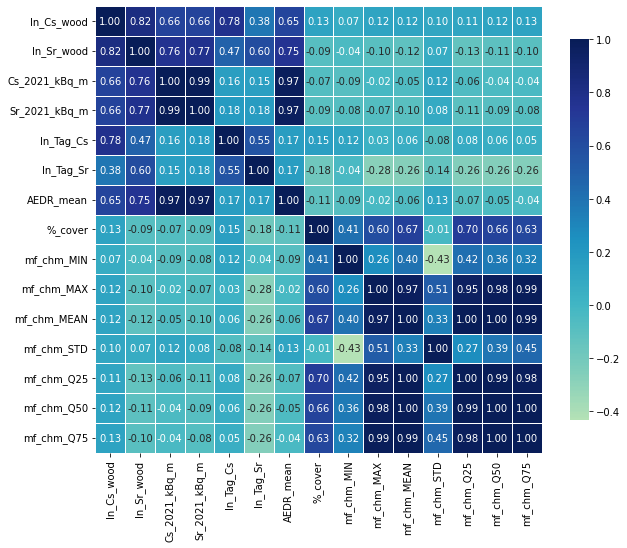

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['%_cover', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Cs'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [11]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MIN,mf_chm_MAX,mf_chm_MEAN,mf_chm_STD,mf_chm_Q25,mf_chm_Q50,mf_chm_Q75,Random1,Random2,Random3,Random4,Random5
0,0.85,0.445070,19.097736,12.233545,4.193715,10.158340,13.747563,15.172448,9.131560,9.374995,11.304164,8.098134,8.736842
1,1.00,12.465903,17.704655,14.964220,0.932190,14.531339,15.015374,15.519281,13.227966,13.080038,12.170884,13.214829,11.713901
2,1.00,13.028298,17.559893,15.329449,0.846132,14.765771,15.384996,15.925676,9.956972,9.636479,8.958313,11.735716,9.476151
3,0.97,2.128231,20.676994,15.392742,1.873981,14.341608,15.447217,16.691563,10.925907,12.308321,5.927522,13.998065,9.532771
4,1.00,12.171553,21.851387,17.944009,1.057209,17.360054,17.947407,18.591763,8.984207,7.481620,4.295620,8.886782,11.309284


In [12]:
# Columns in "y" data collections
y.head()

,ln_Tag_Cs
0,-0.73
1,0.59
2,0.78
3,0.52
4,0.22


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.01765457899832268, -0.2674202237927057, -0.4143234484991887]
    Mean: -0.221
    Std: 0.179

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.0973265  1.3648126  1.21526297]
    Mean: 1.226
    Std: 0.109

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8631096506523234, 1.078524628984742, 1.1250653194022526]
    Mean: 1.022
    Std: 0.114

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model with rank: 1
Mean validation score: -0.476 (std: 0.541)
Parameters: {'colsample_bytree': 0.1291464861801347, 'gamma': 0.16944439691396584, 'learning_rate': 0.06177312393526113, 'max_depth': 2, 'n_estimators': 163, 'subsample': 0.47645360489096805}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.21639214, 0.26788025, 0.20976253, 0.41187053, 0.26652827,
       0.45293322, 0.30374141, 0.50917635, 0.3527174 , 0.38866954]), 'std_fit_time': array([0.06410402, 0.09871855, 0.00441745, 0.07550122, 0.00528556,
       0.09354238, 0.02368662, 0.10878211, 0.0120771 , 0.00480985]), 'mean_score_time': array([0.00603271, 0.00615716, 0.00608039, 0.0071764 , 0.00595107,
       0.00605454, 0.00599885, 0.00641952, 0.00601511, 0.00597186]), 'std_score_time': array([2.29907717e-05, 5.84935580e-05, 6.55627684e-05, 2.12528476e-03,
       7.16155757e-05, 6.17323853e-05, 8.29242988e-05, 9.11602167e-04,
       7.40881889e-05, 3.57358831e-05]), 'param_colsample_bytree': masked_array(data=[0.551721016534908, 0.5806385902595489, 0.6788593431432,
                   0.286226648653175, 0.7108707555840617,
                   0.18580484402886033, 0.7134613926272612,
                   0.7596342597792588, 0.5890390744847624,
                   0.1291464861801347],
             mask=[F

In [20]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.1291464861801347
Gamma: 0.16944439691396584
Learning_rate: 0.06177312393526113
Max_depth: 2
N_estimators: 163
Subsample: 0.47645360489096805


# Estimation of a basic XGBoost model using Loops

In [21]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [22]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.29700	validation_1-rmse:1.32696
[1]	validation_0-rmse:1.27040	validation_1-rmse:1.29797
[2]	validation_0-rmse:1.24729	validation_1-rmse:1.27035


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.22859	validation_1-rmse:1.23330
[4]	validation_0-rmse:1.20905	validation_1-rmse:1.21328
[5]	validation_0-rmse:1.18962	validation_1-rmse:1.19306
[6]	validation_0-rmse:1.17215	validation_1-rmse:1.17349
[7]	validation_0-rmse:1.15303	validation_1-rmse:1.15108
[8]	validation_0-rmse:1.13868	validation_1-rmse:1.13134
[9]	validation_0-rmse:1.11757	validation_1-rmse:1.10896
[10]	validation_0-rmse:1.10568	validation_1-rmse:1.10137
[11]	validation_0-rmse:1.09441	validation_1-rmse:1.08216
[12]	validation_0-rmse:1.07770	validation_1-rmse:1.06876
[13]	validation_0-rmse:1.06749	validation_1-rmse:1.06062
[14]	validation_0-rmse:1.06428	validation_1-rmse:1.05997
[15]	validation_0-rmse:1.05992	validation_1-rmse:1.05369
[16]	validation_0-rmse:1.05037	validation_1-rmse:1.03320
[17]	validation_0-rmse:1.03884	validation_1-rmse:1.01529
[18]	validation_0-rmse:1.03328	validation_1-rmse:1.00663
[19]	validation_0-rmse:1.01979	validation_1-rmse:1.00538
[20]	validation_0-rmse:1.00035	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.26216	validation_1-rmse:1.00109
[4]	validation_0-rmse:1.23001	validation_1-rmse:0.98173
[5]	validation_0-rmse:1.20081	validation_1-rmse:0.96826
[6]	validation_0-rmse:1.19076	validation_1-rmse:0.96799
[7]	validation_0-rmse:1.17630	validation_1-rmse:0.96054
[8]	validation_0-rmse:1.15730	validation_1-rmse:0.95793
[9]	validation_0-rmse:1.13488	validation_1-rmse:0.95302
[10]	validation_0-rmse:1.11685	validation_1-rmse:0.93980
[11]	validation_0-rmse:1.10975	validation_1-rmse:0.93814
[12]	validation_0-rmse:1.09809	validation_1-rmse:0.93130
[13]	validation_0-rmse:1.08605	validation_1-rmse:0.92286
[14]	validation_0-rmse:1.07282	validation_1-rmse:0.91267
[15]	validation_0-rmse:1.06231	validation_1-rmse:0.90866
[16]	validation_0-rmse:1.05754	validation_1-rmse:0.90101
[17]	validation_0-rmse:1.05014	validation_1-rmse:0.90818
[18]	validation_0-rmse:1.04616	validation_1-rmse:0.90919
[19]	validation_0-rmse:1.03081	validation_1-rmse:0.90257
[20]	validation_0-rmse:1.01572	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.12877	validation_1-rmse:1.49100
[6]	validation_0-rmse:1.11312	validation_1-rmse:1.47042
[7]	validation_0-rmse:1.08994	validation_1-rmse:1.43527
[8]	validation_0-rmse:1.07784	validation_1-rmse:1.41673
[9]	validation_0-rmse:1.07127	validation_1-rmse:1.39948
[10]	validation_0-rmse:1.06064	validation_1-rmse:1.38600
[11]	validation_0-rmse:1.04098	validation_1-rmse:1.36368
[12]	validation_0-rmse:1.03305	validation_1-rmse:1.35932
[13]	validation_0-rmse:1.02188	validation_1-rmse:1.34625
[14]	validation_0-rmse:1.01348	validation_1-rmse:1.34449
[15]	validation_0-rmse:1.00680	validation_1-rmse:1.33066
[16]	validation_0-rmse:0.99830	validation_1-rmse:1.30962
[17]	validation_0-rmse:0.98769	validation_1-rmse:1.30302
[18]	validation_0-rmse:0.98544	validation_1-rmse:1.30372
[19]	validation_0-rmse:0.97523	validation_1-rmse:1.29902
[20]	validation_0-rmse:0.95937	validation_1-rmse:1.29578
[21]	validation_0-rmse:0.95341	validation_1-rmse:1.29404
[22]	validation_0-rmse:0.94883	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.20492	validation_1-rmse:0.97208
[7]	validation_0-rmse:1.18845	validation_1-rmse:0.96231
[8]	validation_0-rmse:1.17196	validation_1-rmse:0.94516
[9]	validation_0-rmse:1.15811	validation_1-rmse:0.93334
[10]	validation_0-rmse:1.14760	validation_1-rmse:0.91445
[11]	validation_0-rmse:1.13822	validation_1-rmse:0.91144
[12]	validation_0-rmse:1.13081	validation_1-rmse:0.90773
[13]	validation_0-rmse:1.11657	validation_1-rmse:0.89460
[14]	validation_0-rmse:1.10482	validation_1-rmse:0.90181
[15]	validation_0-rmse:1.08839	validation_1-rmse:0.88135
[16]	validation_0-rmse:1.07831	validation_1-rmse:0.87313
[17]	validation_0-rmse:1.06822	validation_1-rmse:0.87789
[18]	validation_0-rmse:1.06227	validation_1-rmse:0.87796
[19]	validation_0-rmse:1.05429	validation_1-rmse:0.87974
[20]	validation_0-rmse:1.03845	validation_1-rmse:0.85879
[21]	validation_0-rmse:1.03197	validation_1-rmse:0.85415
[22]	validation_0-rmse:1.02105	validation_1-rmse:0.84625
[23]	validation_0-rmse:1.01465	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.03133	validation_1-rmse:1.36911
[12]	validation_0-rmse:1.01277	validation_1-rmse:1.35577
[13]	validation_0-rmse:1.00349	validation_1-rmse:1.33732
[14]	validation_0-rmse:0.99280	validation_1-rmse:1.33641
[15]	validation_0-rmse:0.98389	validation_1-rmse:1.32433
[16]	validation_0-rmse:0.97327	validation_1-rmse:1.31341
[17]	validation_0-rmse:0.96346	validation_1-rmse:1.30718
[18]	validation_0-rmse:0.95313	validation_1-rmse:1.29614
[19]	validation_0-rmse:0.94599	validation_1-rmse:1.28667
[20]	validation_0-rmse:0.92833	validation_1-rmse:1.28401
[21]	validation_0-rmse:0.92560	validation_1-rmse:1.28202
[22]	validation_0-rmse:0.91920	validation_1-rmse:1.27829
[23]	validation_0-rmse:0.91428	validation_1-rmse:1.27749
[24]	validation_0-rmse:0.90408	validation_1-rmse:1.26397
[25]	validation_0-rmse:0.89909	validation_1-rmse:1.26377
[26]	validation_0-rmse:0.88804	validation_1-rmse:1.25363
[27]	validation_0-rmse:0.88377	validation_1-rmse:1.25266
[28]	validation_0-rmse:0.87923	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02021	validation_1-rmse:1.05534
[20]	validation_0-rmse:1.00570	validation_1-rmse:1.04350
[21]	validation_0-rmse:1.00094	validation_1-rmse:1.04495
[22]	validation_0-rmse:1.00145	validation_1-rmse:1.04141
[23]	validation_0-rmse:0.99325	validation_1-rmse:1.03972
[24]	validation_0-rmse:0.98332	validation_1-rmse:1.03629
[25]	validation_0-rmse:0.97689	validation_1-rmse:1.03749
[26]	validation_0-rmse:0.97270	validation_1-rmse:1.03323
[27]	validation_0-rmse:0.96717	validation_1-rmse:1.03552
[28]	validation_0-rmse:0.96026	validation_1-rmse:1.03677
[29]	validation_0-rmse:0.95555	validation_1-rmse:1.03251
[30]	validation_0-rmse:0.95219	validation_1-rmse:1.03062
[31]	validation_0-rmse:0.94379	validation_1-rmse:1.02513
[32]	validation_0-rmse:0.93809	validation_1-rmse:1.02383
[33]	validation_0-rmse:0.93598	validation_1-rmse:1.02481
[34]	validation_0-rmse:0.93286	validation_1-rmse:1.02073
[35]	validation_0-rmse:0.92991	validation_1-rmse:1.01990
[36]	validation_0-rmse:0.92767	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.01130	validation_1-rmse:1.01279
[20]	validation_0-rmse:1.00002	validation_1-rmse:1.00668
[21]	validation_0-rmse:0.99363	validation_1-rmse:1.00551
[22]	validation_0-rmse:0.98289	validation_1-rmse:1.00660
[23]	validation_0-rmse:0.97721	validation_1-rmse:1.00770
[24]	validation_0-rmse:0.96866	validation_1-rmse:1.00126
[25]	validation_0-rmse:0.96375	validation_1-rmse:1.00386
[26]	validation_0-rmse:0.95875	validation_1-rmse:1.00712
[27]	validation_0-rmse:0.95788	validation_1-rmse:1.00396
[28]	validation_0-rmse:0.95535	validation_1-rmse:1.00514
[29]	validation_0-rmse:0.95200	validation_1-rmse:1.01648
[30]	validation_0-rmse:0.94786	validation_1-rmse:1.02019
[31]	validation_0-rmse:0.93570	validation_1-rmse:1.00430
[32]	validation_0-rmse:0.92806	validation_1-rmse:1.00127
[33]	validation_0-rmse:0.92583	validation_1-rmse:0.99514
[34]	validation_0-rmse:0.91939	validation_1-rmse:0.99811
[35]	validation_0-rmse:0.91322	validation_1-rmse:0.99250
[36]	validation_0-rmse:0.90964	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.17303	validation_1-rmse:1.34373
[5]	validation_0-rmse:1.14811	validation_1-rmse:1.32292
[6]	validation_0-rmse:1.13447	validation_1-rmse:1.31249
[7]	validation_0-rmse:1.11643	validation_1-rmse:1.30295
[8]	validation_0-rmse:1.09548	validation_1-rmse:1.28808
[9]	validation_0-rmse:1.08054	validation_1-rmse:1.27274
[10]	validation_0-rmse:1.06088	validation_1-rmse:1.27114
[11]	validation_0-rmse:1.04351	validation_1-rmse:1.24545
[12]	validation_0-rmse:1.02837	validation_1-rmse:1.24231
[13]	validation_0-rmse:1.01832	validation_1-rmse:1.23424
[14]	validation_0-rmse:1.01357	validation_1-rmse:1.22107
[15]	validation_0-rmse:1.00353	validation_1-rmse:1.21138
[16]	validation_0-rmse:0.99375	validation_1-rmse:1.20652
[17]	validation_0-rmse:0.98958	validation_1-rmse:1.19889
[18]	validation_0-rmse:0.97946	validation_1-rmse:1.18687
[19]	validation_0-rmse:0.97258	validation_1-rmse:1.18886
[20]	validation_0-rmse:0.95822	validation_1-rmse:1.17842
[21]	validation_0-rmse:0.94847	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.02961	validation_1-rmse:1.15069
[18]	validation_0-rmse:1.02031	validation_1-rmse:1.13708
[19]	validation_0-rmse:1.01407	validation_1-rmse:1.13540
[20]	validation_0-rmse:0.99861	validation_1-rmse:1.13427
[21]	validation_0-rmse:0.99036	validation_1-rmse:1.12165
[22]	validation_0-rmse:0.98727	validation_1-rmse:1.11916
[23]	validation_0-rmse:0.97996	validation_1-rmse:1.11375
[24]	validation_0-rmse:0.97528	validation_1-rmse:1.10155
[25]	validation_0-rmse:0.97061	validation_1-rmse:1.09050
[26]	validation_0-rmse:0.96996	validation_1-rmse:1.08929
[27]	validation_0-rmse:0.96762	validation_1-rmse:1.09247
[28]	validation_0-rmse:0.96201	validation_1-rmse:1.08199
[29]	validation_0-rmse:0.95748	validation_1-rmse:1.07864
[30]	validation_0-rmse:0.95143	validation_1-rmse:1.06905
[31]	validation_0-rmse:0.93845	validation_1-rmse:1.05748
[32]	validation_0-rmse:0.93063	validation_1-rmse:1.03977
[33]	validation_0-rmse:0.92503	validation_1-rmse:1.02916
[34]	validation_0-rmse:0.91956	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.04282	validation_1-rmse:1.00781
[19]	validation_0-rmse:1.03533	validation_1-rmse:1.00904
[20]	validation_0-rmse:1.02416	validation_1-rmse:0.99140
[21]	validation_0-rmse:1.01809	validation_1-rmse:0.98654
[22]	validation_0-rmse:1.01245	validation_1-rmse:0.97526
[23]	validation_0-rmse:1.00687	validation_1-rmse:0.97413
[24]	validation_0-rmse:0.99616	validation_1-rmse:0.96763
[25]	validation_0-rmse:0.99349	validation_1-rmse:0.96744
[26]	validation_0-rmse:0.99128	validation_1-rmse:0.96709
[27]	validation_0-rmse:0.98927	validation_1-rmse:0.95850
[28]	validation_0-rmse:0.98217	validation_1-rmse:0.96349
[29]	validation_0-rmse:0.97309	validation_1-rmse:0.95916
[30]	validation_0-rmse:0.96764	validation_1-rmse:0.95737
[31]	validation_0-rmse:0.96068	validation_1-rmse:0.95891
[32]	validation_0-rmse:0.95433	validation_1-rmse:0.95494
[33]	validation_0-rmse:0.94868	validation_1-rmse:0.96698
[34]	validation_0-rmse:0.94441	validation_1-rmse:0.96761
[35]	validation_0-rmse:0.93907	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.05326	validation_1-rmse:1.02065
[16]	validation_0-rmse:1.04509	validation_1-rmse:1.01595
[17]	validation_0-rmse:1.03856	validation_1-rmse:1.01025
[18]	validation_0-rmse:1.03093	validation_1-rmse:1.00871
[19]	validation_0-rmse:1.03143	validation_1-rmse:1.00460
[20]	validation_0-rmse:1.01518	validation_1-rmse:1.00996
[21]	validation_0-rmse:1.00818	validation_1-rmse:1.00692
[22]	validation_0-rmse:1.00204	validation_1-rmse:0.99920
[23]	validation_0-rmse:0.99971	validation_1-rmse:0.99625
[24]	validation_0-rmse:0.99593	validation_1-rmse:1.00161
[25]	validation_0-rmse:0.98704	validation_1-rmse:0.99353
[26]	validation_0-rmse:0.98081	validation_1-rmse:0.98342
[27]	validation_0-rmse:0.97631	validation_1-rmse:0.98552
[28]	validation_0-rmse:0.97159	validation_1-rmse:0.98607
[29]	validation_0-rmse:0.96544	validation_1-rmse:0.98519
[30]	validation_0-rmse:0.96378	validation_1-rmse:0.98244
[31]	validation_0-rmse:0.95733	validation_1-rmse:0.97851
[32]	validation_0-rmse:0.95347	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.05472	validation_1-rmse:1.03292
[16]	validation_0-rmse:1.03951	validation_1-rmse:1.03645
[17]	validation_0-rmse:1.02881	validation_1-rmse:1.03446
[18]	validation_0-rmse:1.01774	validation_1-rmse:1.02892
[19]	validation_0-rmse:1.01401	validation_1-rmse:1.02735
[20]	validation_0-rmse:1.00398	validation_1-rmse:1.02002
[21]	validation_0-rmse:0.99718	validation_1-rmse:1.01381
[22]	validation_0-rmse:0.98999	validation_1-rmse:1.01802
[23]	validation_0-rmse:0.98230	validation_1-rmse:1.02102
[24]	validation_0-rmse:0.97775	validation_1-rmse:1.02368
[25]	validation_0-rmse:0.97583	validation_1-rmse:1.02211
[26]	validation_0-rmse:0.96694	validation_1-rmse:1.02889
[27]	validation_0-rmse:0.96456	validation_1-rmse:1.03441
[28]	validation_0-rmse:0.95517	validation_1-rmse:1.04842
[29]	validation_0-rmse:0.94832	validation_1-rmse:1.04885
[0]	validation_0-rmse:1.36741	validation_1-rmse:0.99562
[1]	validation_0-rmse:1.32871	validation_1-rmse:0.98117
[2]	validation_0-rmse:1.30395	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.06684	validation_1-rmse:0.91115
[17]	validation_0-rmse:1.05317	validation_1-rmse:0.90899
[18]	validation_0-rmse:1.04176	validation_1-rmse:0.91543
[19]	validation_0-rmse:1.03663	validation_1-rmse:0.91837
[20]	validation_0-rmse:1.02395	validation_1-rmse:0.92344
[21]	validation_0-rmse:1.01459	validation_1-rmse:0.92365
[22]	validation_0-rmse:1.00928	validation_1-rmse:0.93078
[23]	validation_0-rmse:1.00514	validation_1-rmse:0.93411
[24]	validation_0-rmse:1.00212	validation_1-rmse:0.92846
[25]	validation_0-rmse:0.99966	validation_1-rmse:0.92600
[26]	validation_0-rmse:0.99119	validation_1-rmse:0.92264
[27]	validation_0-rmse:0.98710	validation_1-rmse:0.92162
[28]	validation_0-rmse:0.98363	validation_1-rmse:0.91727
[29]	validation_0-rmse:0.98257	validation_1-rmse:0.91528
[30]	validation_0-rmse:0.97793	validation_1-rmse:0.91498
[31]	validation_0-rmse:0.96579	validation_1-rmse:0.90826
[32]	validation_0-rmse:0.95604	validation_1-rmse:0.90201
[33]	validation_0-rmse:0.95247	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.02859	validation_1-rmse:1.29598
[15]	validation_0-rmse:1.02073	validation_1-rmse:1.28708
[16]	validation_0-rmse:1.01253	validation_1-rmse:1.27541
[17]	validation_0-rmse:0.99805	validation_1-rmse:1.27869
[18]	validation_0-rmse:0.98937	validation_1-rmse:1.25264
[19]	validation_0-rmse:0.98217	validation_1-rmse:1.25383
[20]	validation_0-rmse:0.97318	validation_1-rmse:1.25239
[21]	validation_0-rmse:0.96500	validation_1-rmse:1.25020
[22]	validation_0-rmse:0.96094	validation_1-rmse:1.23845
[23]	validation_0-rmse:0.95086	validation_1-rmse:1.22801
[24]	validation_0-rmse:0.94103	validation_1-rmse:1.22480
[25]	validation_0-rmse:0.93443	validation_1-rmse:1.22378
[26]	validation_0-rmse:0.93351	validation_1-rmse:1.22158
[27]	validation_0-rmse:0.92693	validation_1-rmse:1.21264
[28]	validation_0-rmse:0.91825	validation_1-rmse:1.21540
[29]	validation_0-rmse:0.91327	validation_1-rmse:1.20605
[30]	validation_0-rmse:0.90957	validation_1-rmse:1.20270
[31]	validation_0-rmse:0.89849	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.14024	validation_1-rmse:1.41687
[5]	validation_0-rmse:1.11304	validation_1-rmse:1.39517
[6]	validation_0-rmse:1.09506	validation_1-rmse:1.37661
[7]	validation_0-rmse:1.07831	validation_1-rmse:1.35856
[8]	validation_0-rmse:1.05771	validation_1-rmse:1.34991
[9]	validation_0-rmse:1.04128	validation_1-rmse:1.32903
[10]	validation_0-rmse:1.01948	validation_1-rmse:1.31580
[11]	validation_0-rmse:1.01209	validation_1-rmse:1.31201
[12]	validation_0-rmse:0.99971	validation_1-rmse:1.30890
[13]	validation_0-rmse:0.98814	validation_1-rmse:1.30519
[14]	validation_0-rmse:0.98066	validation_1-rmse:1.30430
[15]	validation_0-rmse:0.96776	validation_1-rmse:1.29587
[16]	validation_0-rmse:0.95676	validation_1-rmse:1.28869
[17]	validation_0-rmse:0.94864	validation_1-rmse:1.28489
[18]	validation_0-rmse:0.93749	validation_1-rmse:1.27601
[19]	validation_0-rmse:0.93402	validation_1-rmse:1.27300
[20]	validation_0-rmse:0.92474	validation_1-rmse:1.26973
[21]	validation_0-rmse:0.91394	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.21208	validation_1-rmse:1.17939
[5]	validation_0-rmse:1.18541	validation_1-rmse:1.18585
[6]	validation_0-rmse:1.15654	validation_1-rmse:1.18801
[7]	validation_0-rmse:1.13632	validation_1-rmse:1.19126
[8]	validation_0-rmse:1.11748	validation_1-rmse:1.18140
[9]	validation_0-rmse:1.10181	validation_1-rmse:1.18247
[10]	validation_0-rmse:1.08864	validation_1-rmse:1.17108
[11]	validation_0-rmse:1.07720	validation_1-rmse:1.17696
[12]	validation_0-rmse:1.06237	validation_1-rmse:1.18011
[13]	validation_0-rmse:1.05392	validation_1-rmse:1.17550
[14]	validation_0-rmse:1.04475	validation_1-rmse:1.16559
[15]	validation_0-rmse:1.03050	validation_1-rmse:1.16828
[16]	validation_0-rmse:1.01887	validation_1-rmse:1.17697
[17]	validation_0-rmse:1.00921	validation_1-rmse:1.17049
[18]	validation_0-rmse:0.99400	validation_1-rmse:1.18408
[19]	validation_0-rmse:0.97951	validation_1-rmse:1.18227
[20]	validation_0-rmse:0.96781	validation_1-rmse:1.17666
[21]	validation_0-rmse:0.95543	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.16187	validation_1-rmse:1.01722
[8]	validation_0-rmse:1.14378	validation_1-rmse:0.99511
[9]	validation_0-rmse:1.12676	validation_1-rmse:0.97503
[10]	validation_0-rmse:1.11665	validation_1-rmse:0.96359
[11]	validation_0-rmse:1.10419	validation_1-rmse:0.95874
[12]	validation_0-rmse:1.08263	validation_1-rmse:0.94700
[13]	validation_0-rmse:1.07019	validation_1-rmse:0.93358
[14]	validation_0-rmse:1.05692	validation_1-rmse:0.92436
[15]	validation_0-rmse:1.04946	validation_1-rmse:0.92057
[16]	validation_0-rmse:1.03631	validation_1-rmse:0.91160
[17]	validation_0-rmse:1.02377	validation_1-rmse:0.90694
[18]	validation_0-rmse:1.01658	validation_1-rmse:0.90928
[19]	validation_0-rmse:1.00782	validation_1-rmse:0.90954
[20]	validation_0-rmse:0.99759	validation_1-rmse:0.90765
[21]	validation_0-rmse:0.98747	validation_1-rmse:0.90826
[22]	validation_0-rmse:0.98355	validation_1-rmse:0.90173
[23]	validation_0-rmse:0.97658	validation_1-rmse:0.90253
[24]	validation_0-rmse:0.96979	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.19232	validation_1-rmse:1.15895
[6]	validation_0-rmse:1.17594	validation_1-rmse:1.14376
[7]	validation_0-rmse:1.15084	validation_1-rmse:1.13524
[8]	validation_0-rmse:1.13627	validation_1-rmse:1.12987
[9]	validation_0-rmse:1.11893	validation_1-rmse:1.12522
[10]	validation_0-rmse:1.10255	validation_1-rmse:1.11272
[11]	validation_0-rmse:1.09807	validation_1-rmse:1.11660
[12]	validation_0-rmse:1.08462	validation_1-rmse:1.11489
[13]	validation_0-rmse:1.06986	validation_1-rmse:1.10331
[14]	validation_0-rmse:1.05854	validation_1-rmse:1.09249
[15]	validation_0-rmse:1.04889	validation_1-rmse:1.09412
[16]	validation_0-rmse:1.03829	validation_1-rmse:1.08980
[17]	validation_0-rmse:1.03101	validation_1-rmse:1.08799
[18]	validation_0-rmse:1.01941	validation_1-rmse:1.08086
[19]	validation_0-rmse:1.00751	validation_1-rmse:1.08195
[20]	validation_0-rmse:0.99706	validation_1-rmse:1.07691
[21]	validation_0-rmse:0.98790	validation_1-rmse:1.07901
[22]	validation_0-rmse:0.97908	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.12563	validation_1-rmse:1.18583
[9]	validation_0-rmse:1.11469	validation_1-rmse:1.17445
[10]	validation_0-rmse:1.09496	validation_1-rmse:1.16147
[11]	validation_0-rmse:1.08360	validation_1-rmse:1.14478
[12]	validation_0-rmse:1.06884	validation_1-rmse:1.12936
[13]	validation_0-rmse:1.05170	validation_1-rmse:1.11931
[14]	validation_0-rmse:1.04608	validation_1-rmse:1.10813
[15]	validation_0-rmse:1.03746	validation_1-rmse:1.09909
[16]	validation_0-rmse:1.02901	validation_1-rmse:1.08502
[17]	validation_0-rmse:1.02658	validation_1-rmse:1.07651
[18]	validation_0-rmse:1.01371	validation_1-rmse:1.05561
[19]	validation_0-rmse:1.00719	validation_1-rmse:1.05026
[20]	validation_0-rmse:0.99822	validation_1-rmse:1.04308
[21]	validation_0-rmse:0.98865	validation_1-rmse:1.02791
[22]	validation_0-rmse:0.98051	validation_1-rmse:1.03116
[23]	validation_0-rmse:0.96810	validation_1-rmse:1.02746
[24]	validation_0-rmse:0.96144	validation_1-rmse:1.01364
[25]	validation_0-rmse:0.95641	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.04336	validation_1-rmse:1.16290
[15]	validation_0-rmse:1.03468	validation_1-rmse:1.15417
[16]	validation_0-rmse:1.01877	validation_1-rmse:1.15296
[17]	validation_0-rmse:1.01100	validation_1-rmse:1.14741
[18]	validation_0-rmse:0.99748	validation_1-rmse:1.13298
[19]	validation_0-rmse:0.98857	validation_1-rmse:1.12559
[20]	validation_0-rmse:0.97475	validation_1-rmse:1.12426
[21]	validation_0-rmse:0.96421	validation_1-rmse:1.12461
[22]	validation_0-rmse:0.95781	validation_1-rmse:1.12534
[23]	validation_0-rmse:0.95209	validation_1-rmse:1.12557
[24]	validation_0-rmse:0.94700	validation_1-rmse:1.12176
[25]	validation_0-rmse:0.93832	validation_1-rmse:1.13049
[26]	validation_0-rmse:0.93118	validation_1-rmse:1.11947
[27]	validation_0-rmse:0.92738	validation_1-rmse:1.11493
[28]	validation_0-rmse:0.92183	validation_1-rmse:1.11292
[29]	validation_0-rmse:0.91427	validation_1-rmse:1.11130
[30]	validation_0-rmse:0.90871	validation_1-rmse:1.11354
[31]	validation_0-rmse:0.90017	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.08776	validation_1-rmse:0.84518
[14]	validation_0-rmse:1.07825	validation_1-rmse:0.84529
[15]	validation_0-rmse:1.06383	validation_1-rmse:0.84534
[16]	validation_0-rmse:1.05639	validation_1-rmse:0.84842
[17]	validation_0-rmse:1.04698	validation_1-rmse:0.84349
[18]	validation_0-rmse:1.03616	validation_1-rmse:0.84812
[19]	validation_0-rmse:1.02625	validation_1-rmse:0.84772
[20]	validation_0-rmse:1.01591	validation_1-rmse:0.83922
[21]	validation_0-rmse:1.00792	validation_1-rmse:0.83491
[22]	validation_0-rmse:0.99707	validation_1-rmse:0.82917
[23]	validation_0-rmse:0.99231	validation_1-rmse:0.82879
[24]	validation_0-rmse:0.98765	validation_1-rmse:0.82686
[25]	validation_0-rmse:0.98298	validation_1-rmse:0.83318
[26]	validation_0-rmse:0.97916	validation_1-rmse:0.84022
[27]	validation_0-rmse:0.97666	validation_1-rmse:0.83932
[28]	validation_0-rmse:0.97518	validation_1-rmse:0.84807
[29]	validation_0-rmse:0.96837	validation_1-rmse:0.84965
[30]	validation_0-rmse:0.96485	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.01278	validation_1-rmse:1.30699
[15]	validation_0-rmse:1.00408	validation_1-rmse:1.29752
[16]	validation_0-rmse:0.99306	validation_1-rmse:1.29415
[17]	validation_0-rmse:0.98176	validation_1-rmse:1.27963
[18]	validation_0-rmse:0.97471	validation_1-rmse:1.27206
[19]	validation_0-rmse:0.96967	validation_1-rmse:1.26906
[20]	validation_0-rmse:0.96207	validation_1-rmse:1.26203
[21]	validation_0-rmse:0.95934	validation_1-rmse:1.26027
[22]	validation_0-rmse:0.95118	validation_1-rmse:1.25136
[23]	validation_0-rmse:0.94967	validation_1-rmse:1.24620
[24]	validation_0-rmse:0.94590	validation_1-rmse:1.24295
[25]	validation_0-rmse:0.93969	validation_1-rmse:1.23786
[26]	validation_0-rmse:0.93502	validation_1-rmse:1.23561
[27]	validation_0-rmse:0.92428	validation_1-rmse:1.22163
[28]	validation_0-rmse:0.91680	validation_1-rmse:1.21749
[29]	validation_0-rmse:0.91297	validation_1-rmse:1.21195
[30]	validation_0-rmse:0.91136	validation_1-rmse:1.21795
[31]	validation_0-rmse:0.90472	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.04136	validation_1-rmse:0.97561
[17]	validation_0-rmse:1.03386	validation_1-rmse:0.96834
[18]	validation_0-rmse:1.03334	validation_1-rmse:0.96650
[19]	validation_0-rmse:1.02899	validation_1-rmse:0.96284
[20]	validation_0-rmse:1.01028	validation_1-rmse:0.96528
[21]	validation_0-rmse:0.99988	validation_1-rmse:0.96107
[22]	validation_0-rmse:0.99093	validation_1-rmse:0.95980
[23]	validation_0-rmse:0.98408	validation_1-rmse:0.94679
[24]	validation_0-rmse:0.97653	validation_1-rmse:0.94937
[25]	validation_0-rmse:0.97312	validation_1-rmse:0.94705
[26]	validation_0-rmse:0.97306	validation_1-rmse:0.94677
[27]	validation_0-rmse:0.97089	validation_1-rmse:0.94212
[28]	validation_0-rmse:0.95741	validation_1-rmse:0.95018
[29]	validation_0-rmse:0.95363	validation_1-rmse:0.94793
[30]	validation_0-rmse:0.94968	validation_1-rmse:0.95042
[31]	validation_0-rmse:0.93516	validation_1-rmse:0.93988
[32]	validation_0-rmse:0.92534	validation_1-rmse:0.93660
[33]	validation_0-rmse:0.92193	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.06716	validation_1-rmse:0.83601
[19]	validation_0-rmse:1.06389	validation_1-rmse:0.83537
[20]	validation_0-rmse:1.04932	validation_1-rmse:0.83205
[21]	validation_0-rmse:1.04062	validation_1-rmse:0.82193
[22]	validation_0-rmse:1.03688	validation_1-rmse:0.82654
[23]	validation_0-rmse:1.02423	validation_1-rmse:0.81926
[24]	validation_0-rmse:1.01302	validation_1-rmse:0.81127
[25]	validation_0-rmse:1.00796	validation_1-rmse:0.81189
[26]	validation_0-rmse:1.00076	validation_1-rmse:0.81598
[27]	validation_0-rmse:0.99844	validation_1-rmse:0.81080
[28]	validation_0-rmse:0.98799	validation_1-rmse:0.81292
[29]	validation_0-rmse:0.98026	validation_1-rmse:0.81689
[30]	validation_0-rmse:0.97590	validation_1-rmse:0.82343
[31]	validation_0-rmse:0.96910	validation_1-rmse:0.82784
[32]	validation_0-rmse:0.96246	validation_1-rmse:0.83590
[33]	validation_0-rmse:0.95920	validation_1-rmse:0.83617
[34]	validation_0-rmse:0.95484	validation_1-rmse:0.82830
[35]	validation_0-rmse:0.95025	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.09649	validation_1-rmse:0.82988
[15]	validation_0-rmse:1.07790	validation_1-rmse:0.83198
[16]	validation_0-rmse:1.07284	validation_1-rmse:0.83033
[17]	validation_0-rmse:1.06540	validation_1-rmse:0.82621
[18]	validation_0-rmse:1.05723	validation_1-rmse:0.83922
[19]	validation_0-rmse:1.04597	validation_1-rmse:0.83827
[20]	validation_0-rmse:1.03059	validation_1-rmse:0.83455
[21]	validation_0-rmse:1.01896	validation_1-rmse:0.83028
[22]	validation_0-rmse:1.01762	validation_1-rmse:0.83306
[23]	validation_0-rmse:1.00699	validation_1-rmse:0.83362
[24]	validation_0-rmse:0.99648	validation_1-rmse:0.83214
[25]	validation_0-rmse:0.99188	validation_1-rmse:0.83238
[26]	validation_0-rmse:0.98685	validation_1-rmse:0.84070
[27]	validation_0-rmse:0.98157	validation_1-rmse:0.85207
[28]	validation_0-rmse:0.97498	validation_1-rmse:0.86195
[29]	validation_0-rmse:0.96497	validation_1-rmse:0.85241
[30]	validation_0-rmse:0.96027	validation_1-rmse:0.85128
[31]	validation_0-rmse:0.95074	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.97573	validation_1-rmse:1.31273
[19]	validation_0-rmse:0.96937	validation_1-rmse:1.29308
[20]	validation_0-rmse:0.95859	validation_1-rmse:1.29313
[21]	validation_0-rmse:0.94763	validation_1-rmse:1.27760
[22]	validation_0-rmse:0.94152	validation_1-rmse:1.27141
[23]	validation_0-rmse:0.93642	validation_1-rmse:1.26412
[24]	validation_0-rmse:0.93085	validation_1-rmse:1.25490
[25]	validation_0-rmse:0.92396	validation_1-rmse:1.24470
[26]	validation_0-rmse:0.92311	validation_1-rmse:1.24761
[27]	validation_0-rmse:0.91962	validation_1-rmse:1.23840
[28]	validation_0-rmse:0.91453	validation_1-rmse:1.22574
[29]	validation_0-rmse:0.90789	validation_1-rmse:1.22805
[30]	validation_0-rmse:0.90389	validation_1-rmse:1.22003
[31]	validation_0-rmse:0.89577	validation_1-rmse:1.22326
[32]	validation_0-rmse:0.88691	validation_1-rmse:1.20850
[33]	validation_0-rmse:0.87846	validation_1-rmse:1.21027
[34]	validation_0-rmse:0.87522	validation_1-rmse:1.20711
[35]	validation_0-rmse:0.86954	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.97597	validation_1-rmse:1.29597
[17]	validation_0-rmse:0.96190	validation_1-rmse:1.29175
[18]	validation_0-rmse:0.95567	validation_1-rmse:1.29064
[19]	validation_0-rmse:0.94681	validation_1-rmse:1.28745
[20]	validation_0-rmse:0.93864	validation_1-rmse:1.27123
[21]	validation_0-rmse:0.93547	validation_1-rmse:1.27317
[22]	validation_0-rmse:0.92721	validation_1-rmse:1.27567
[23]	validation_0-rmse:0.92061	validation_1-rmse:1.27873
[24]	validation_0-rmse:0.91430	validation_1-rmse:1.28009
[25]	validation_0-rmse:0.90921	validation_1-rmse:1.27819
[26]	validation_0-rmse:0.90652	validation_1-rmse:1.27204
[27]	validation_0-rmse:0.90054	validation_1-rmse:1.26683
[28]	validation_0-rmse:0.89403	validation_1-rmse:1.26704
[29]	validation_0-rmse:0.89159	validation_1-rmse:1.26622
[30]	validation_0-rmse:0.88882	validation_1-rmse:1.27070
[31]	validation_0-rmse:0.87716	validation_1-rmse:1.26215
[32]	validation_0-rmse:0.86869	validation_1-rmse:1.26764
[33]	validation_0-rmse:0.86707	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.03093	validation_1-rmse:1.12530
[17]	validation_0-rmse:1.01940	validation_1-rmse:1.13359
[18]	validation_0-rmse:1.01263	validation_1-rmse:1.13725
[19]	validation_0-rmse:1.00534	validation_1-rmse:1.13566
[20]	validation_0-rmse:0.99336	validation_1-rmse:1.12354
[21]	validation_0-rmse:0.98445	validation_1-rmse:1.12567
[22]	validation_0-rmse:0.98004	validation_1-rmse:1.12126
[23]	validation_0-rmse:0.97412	validation_1-rmse:1.13191
[24]	validation_0-rmse:0.96212	validation_1-rmse:1.12675
[25]	validation_0-rmse:0.95754	validation_1-rmse:1.11863
[26]	validation_0-rmse:0.95816	validation_1-rmse:1.11781
[27]	validation_0-rmse:0.95858	validation_1-rmse:1.12390
[28]	validation_0-rmse:0.95495	validation_1-rmse:1.11955
[29]	validation_0-rmse:0.95142	validation_1-rmse:1.11522
[30]	validation_0-rmse:0.94302	validation_1-rmse:1.11369
[31]	validation_0-rmse:0.93619	validation_1-rmse:1.09856
[32]	validation_0-rmse:0.93041	validation_1-rmse:1.09707
[33]	validation_0-rmse:0.92555	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.96505	validation_1-rmse:1.29487
[17]	validation_0-rmse:0.95698	validation_1-rmse:1.29237
[18]	validation_0-rmse:0.95007	validation_1-rmse:1.28673
[19]	validation_0-rmse:0.94297	validation_1-rmse:1.28539
[20]	validation_0-rmse:0.93016	validation_1-rmse:1.27870
[21]	validation_0-rmse:0.91665	validation_1-rmse:1.27850
[22]	validation_0-rmse:0.91169	validation_1-rmse:1.27569
[23]	validation_0-rmse:0.90384	validation_1-rmse:1.27066
[24]	validation_0-rmse:0.90150	validation_1-rmse:1.26510
[25]	validation_0-rmse:0.89404	validation_1-rmse:1.25684
[26]	validation_0-rmse:0.88720	validation_1-rmse:1.25398
[27]	validation_0-rmse:0.87724	validation_1-rmse:1.24466
[28]	validation_0-rmse:0.87384	validation_1-rmse:1.24085
[29]	validation_0-rmse:0.86246	validation_1-rmse:1.23174
[30]	validation_0-rmse:0.85542	validation_1-rmse:1.23720
[31]	validation_0-rmse:0.84893	validation_1-rmse:1.23386
[32]	validation_0-rmse:0.84092	validation_1-rmse:1.24310
[33]	validation_0-rmse:0.83830	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.02399	validation_1-rmse:0.99869
[17]	validation_0-rmse:1.01719	validation_1-rmse:0.99595
[18]	validation_0-rmse:1.01320	validation_1-rmse:0.99913
[19]	validation_0-rmse:1.00318	validation_1-rmse:0.99803
[20]	validation_0-rmse:0.99612	validation_1-rmse:1.00072
[21]	validation_0-rmse:0.99050	validation_1-rmse:1.00172
[22]	validation_0-rmse:0.98571	validation_1-rmse:0.99236
[23]	validation_0-rmse:0.97750	validation_1-rmse:0.98949
[24]	validation_0-rmse:0.97100	validation_1-rmse:0.98868
[25]	validation_0-rmse:0.96284	validation_1-rmse:0.99161
[26]	validation_0-rmse:0.96149	validation_1-rmse:0.99437
[27]	validation_0-rmse:0.95998	validation_1-rmse:0.99636
[28]	validation_0-rmse:0.95323	validation_1-rmse:0.99208
[29]	validation_0-rmse:0.95125	validation_1-rmse:0.98862
[30]	validation_0-rmse:0.94948	validation_1-rmse:0.98990
[31]	validation_0-rmse:0.93585	validation_1-rmse:0.98536
[32]	validation_0-rmse:0.92737	validation_1-rmse:0.98330
[33]	validation_0-rmse:0.91442	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [25]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [24]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 46.0, median: 39.5,
 pred. interval (P(0.025)-P(0.975)): 12.625-101.25, 
 conf. interval (p-value=0.95): 33.73-51.362 
***
Aggregate bias statistic: 
 mean: 1.941, median: 2.315,
 pred. interval (P(0.025)-P(0.975)): -4.099-7.215, 
 conf. interval (p-value=0.95): 0.318-3.51 
***
Aggregate RMSE statistic: 
 mean: 1.011, median: 0.979, pred. interval (P(0.025)-P(0.975)): 0.81-1.233, 
 conf. interval (p-value=0.95): 0.939-1.055 
***
Aggregate MSE statistic: 
 mean: 1.041, median: 0.959, pred. interval (P(0.025)-P(0.975)): 0.655-1.52, 
 conf. interval (p-value=0.95): 0.883-1.121 
***
Aggregate R^2 statistic: 
 mean: 0.089, median: 0.101, pred. interval (P(0.025)-P(0.975)): -0.127-0.299, 
 conf. interval (p-value=0.95): 0.054-0.137 
***
Aggregate bias(%) statistic: 
 mean: -7.851, median: 2.315, pred. interval (P(0.025)-P(0.975)): -121.04-92.666, 
 conf. interval (p-value=0.95): -15.514-0.049 
***
Aggregate RMSE(%) statistic: 
 mean: 

# ***Training on all data***

# Creating a final XGBoost model

In [26]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [27]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [28]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.30883
[1]	validation_0-rmse:1.28782
[2]	validation_0-rmse:1.26788


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.23582
[4]	validation_0-rmse:1.20796
[5]	validation_0-rmse:1.19254
[6]	validation_0-rmse:1.17174
[7]	validation_0-rmse:1.15337
[8]	validation_0-rmse:1.13919
[9]	validation_0-rmse:1.12368
[10]	validation_0-rmse:1.11586
[11]	validation_0-rmse:1.10445
[12]	validation_0-rmse:1.09308
[13]	validation_0-rmse:1.08021
[14]	validation_0-rmse:1.06698
[15]	validation_0-rmse:1.05031
[16]	validation_0-rmse:1.04621
[17]	validation_0-rmse:1.03629
[18]	validation_0-rmse:1.03147
[19]	validation_0-rmse:1.02286
[20]	validation_0-rmse:1.01734
[21]	validation_0-rmse:1.00713
[22]	validation_0-rmse:0.99949
[23]	validation_0-rmse:0.99366
[24]	validation_0-rmse:0.98066
[25]	validation_0-rmse:0.97981
[26]	validation_0-rmse:0.97321
[27]	validation_0-rmse:0.96977
[28]	validation_0-rmse:0.96107
[29]	validation_0-rmse:0.95455
[30]	validation_0-rmse:0.95561
[31]	validation_0-rmse:0.95410
[32]	validation_0-rmse:0.94759
[33]	validation_0-rmse:0.94667
[34]	validation_0-rmse:0.94157
[35]	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [29]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 162


In [30]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

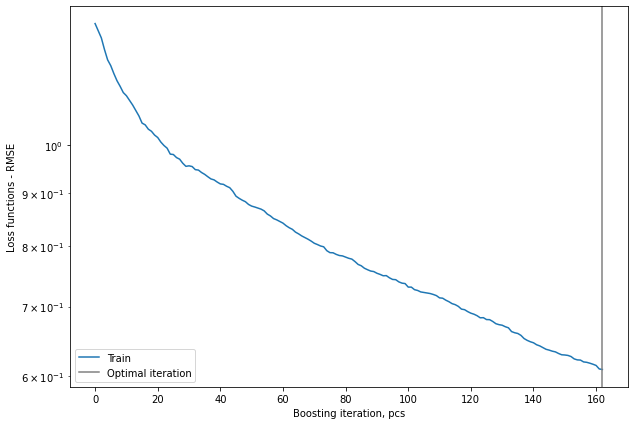

In [31]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [32]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [33]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  4.27
RMSE: 0.6
Relative RMSE(%):  -2.419
MSE: 0.4
R square: 69.3%


In [34]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.131
a1: 0.522
R^2: 0.776
Uncertainty
a0: -0.131+/-0.031
a1: 0.522+/-0.028


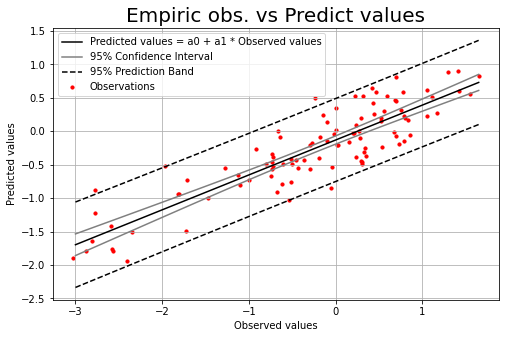

In [36]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

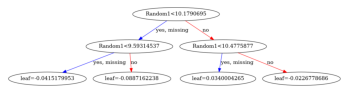

In [37]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

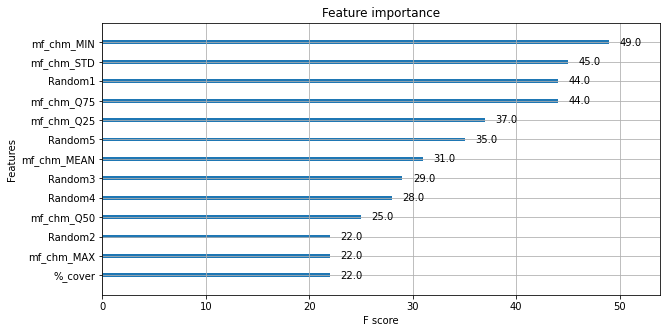

In [39]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

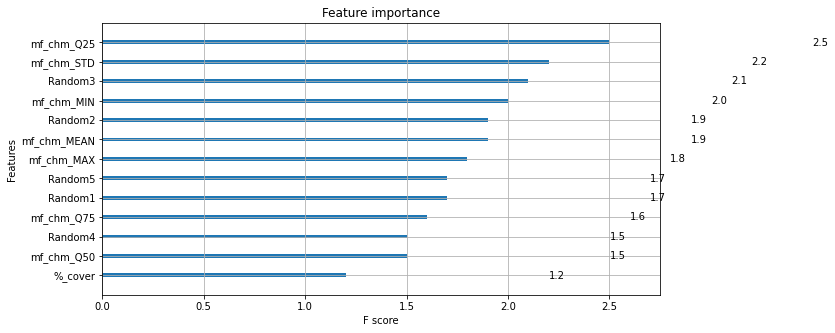

In [40]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

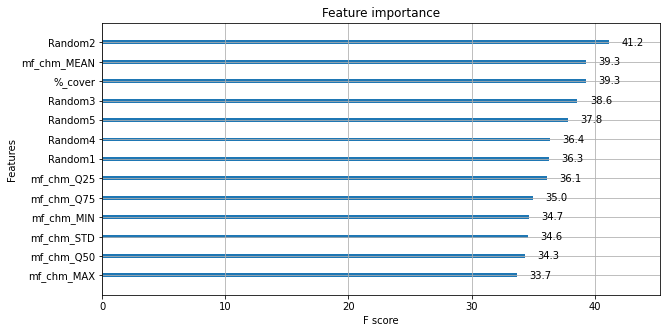

In [41]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [42]:
# Load SHAP`s library
import shap

In [43]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


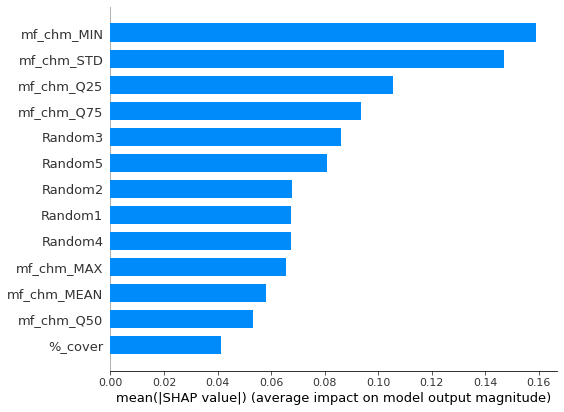

In [44]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

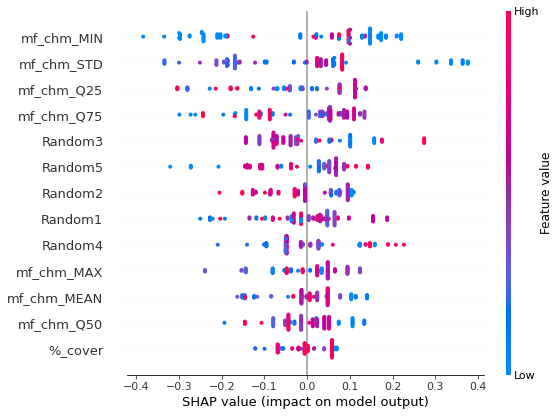

In [45]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

invalid value encountered in true_divide
invalid value encountered in true_divide


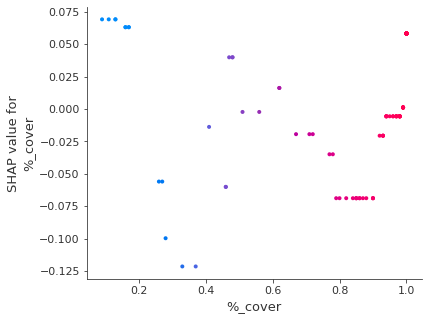

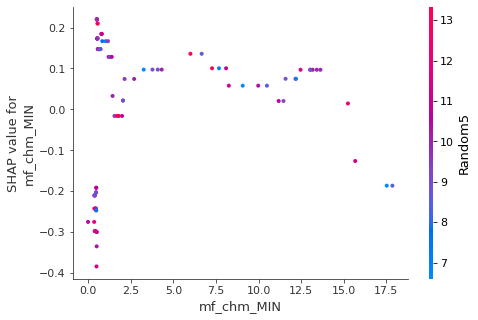

invalid value encountered in true_divide
invalid value encountered in true_divide


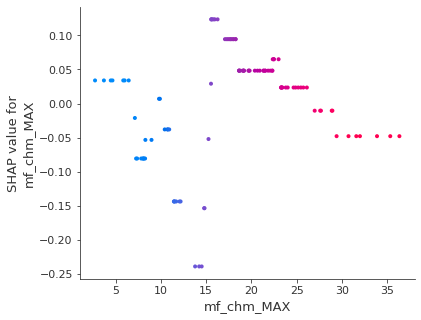

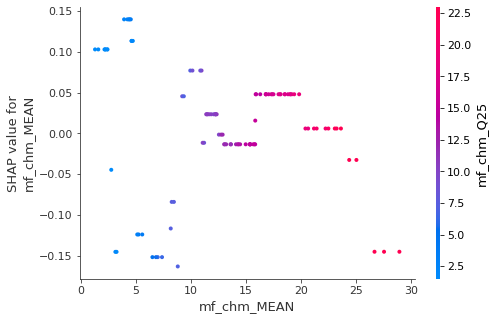

invalid value encountered in true_divide
invalid value encountered in true_divide


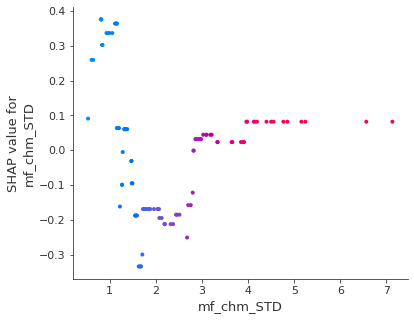

invalid value encountered in true_divide
invalid value encountered in true_divide


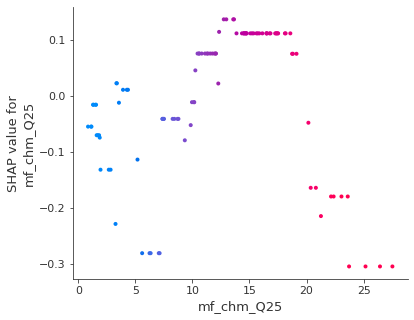

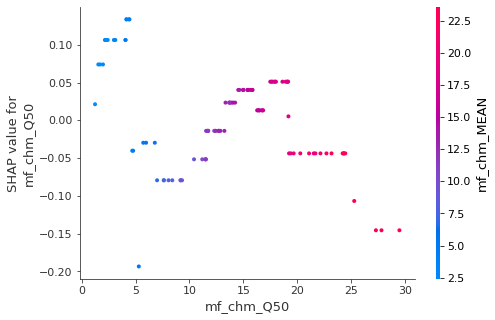

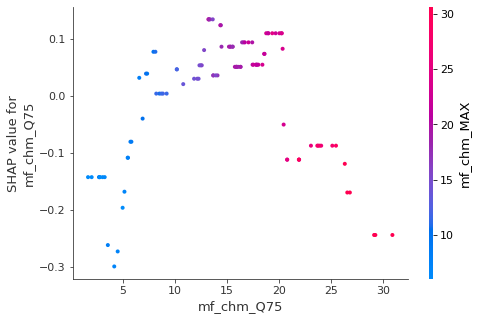

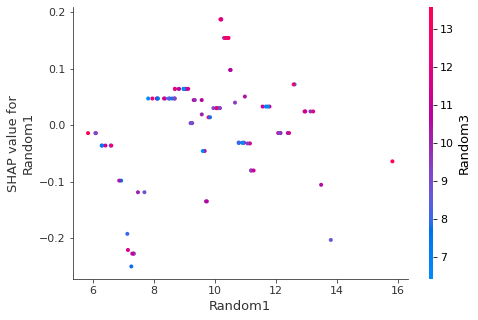

invalid value encountered in true_divide
invalid value encountered in true_divide


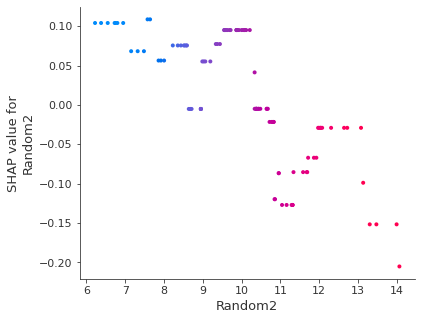

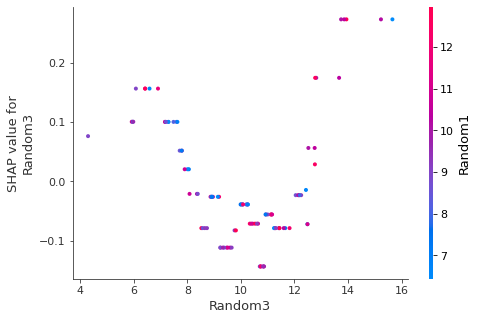

invalid value encountered in true_divide
invalid value encountered in true_divide


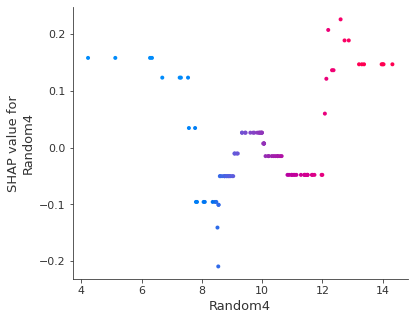

invalid value encountered in true_divide
invalid value encountered in true_divide


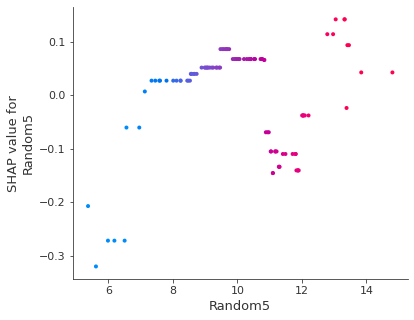

In [46]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.txt")